### *Segmentation de Clients d’un Distributeur en Gros avec K-Means*

In [2]:
# importation des libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Charger les données
data=pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### **Prétraitement des données (nettoyage, normalisation)**

In [5]:
data.shape

(440, 8)

In [6]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [7]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
# Valeurs manquantes par colonne
data.isnull().sum()                         

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
# Compter les doublons
data.duplicated().sum()                     

0

In [11]:
colonnes_fr=["Canal", "Région", "Produits_frais", "Lait", "Épicerie", "Surgelés", "Détergents_et_papier", "Charcuterie"]
data.columns=colonnes_fr
data.head(3)

,Canal,Région,Produits_frais,Lait,Épicerie,Surgelés,Détergents_et_papier,Charcuterie
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [12]:
num_colomns=["Produits_frais", "Lait", "Épicerie", "Surgelés", "Détergents_et_papier", "Charcuterie"]
X = data[num_colomns]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir en DataFrame avec les mêmes noms de colonnes
X_scaled = pd.DataFrame(X_scaled, columns=num_colomns)

# Aperçu des données normalisées
X_scaled.head(3)

,Produits_frais,Lait,Épicerie,Surgelés,Détergents_et_papier,Charcuterie
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293


In [47]:
cols_dim2 = ["Produits_frais", "Lait"]
X_dim2 = data[cols_dim2]

# Normalisation des données
X_scaled_dim2 = scaler.fit_transform(X_dim2)

# Convertir en DataFrame avec les mêmes noms de colonnes
X_scaled_dim2 = pd.DataFrame(X_scaled_dim2, columns=cols_dim2)

# Aperçu des données normalisées
X_scaled_dim2.head(3)

,Produits_frais,Lait
0,0.052933,0.523568
1,-0.391302,0.544458
2,-0.447029,0.408538


#### **Analyse exploratoire (visualisations, corrélations)**

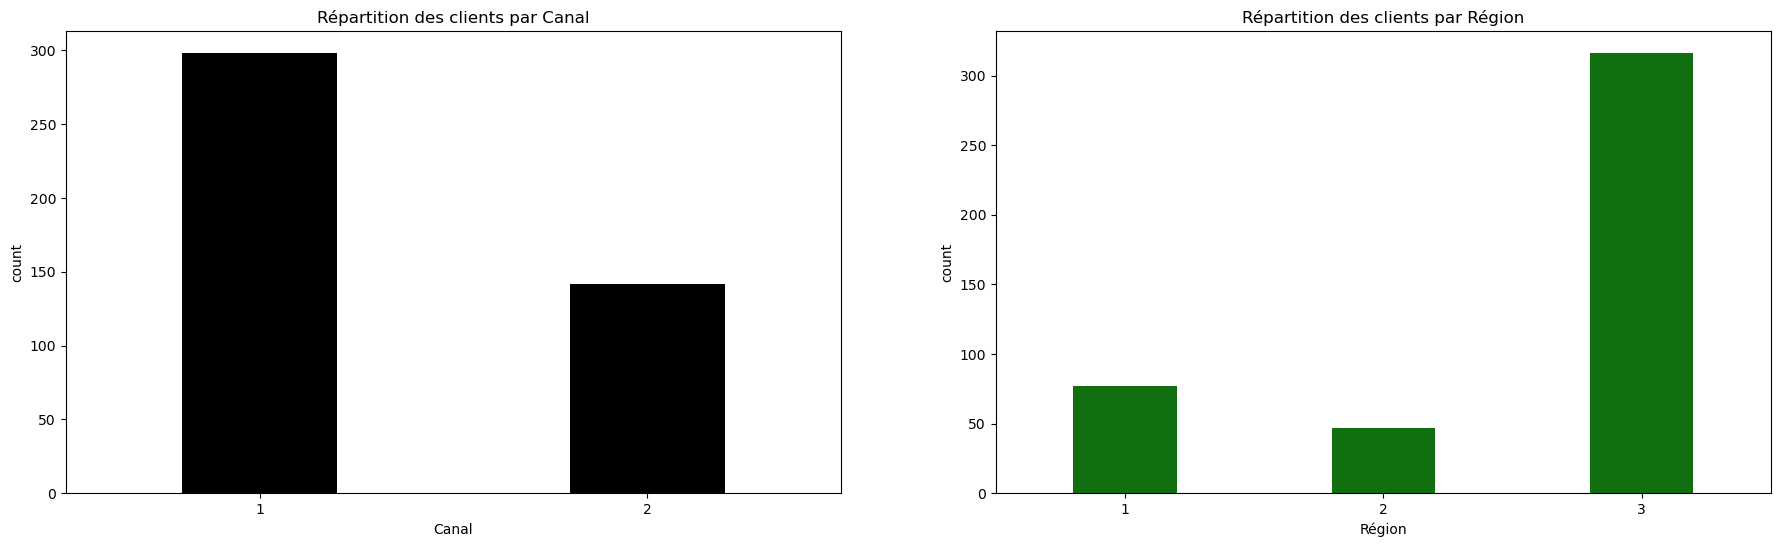

In [15]:
# Distribution des catégories: Répartition des clients par Canal et Région
# Utilité : Voir quels canaux ou régions sont les plus représentés
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
plt.title("Répartition des clients par Canal")
sns.countplot(x='Canal', data=data, color="black", width=0.4)

plt.subplot(1, 2, 2)
plt.title("Répartition des clients par Région")
sns.countplot(x='Région', data=data, color="green", width=0.4)
plt.show()

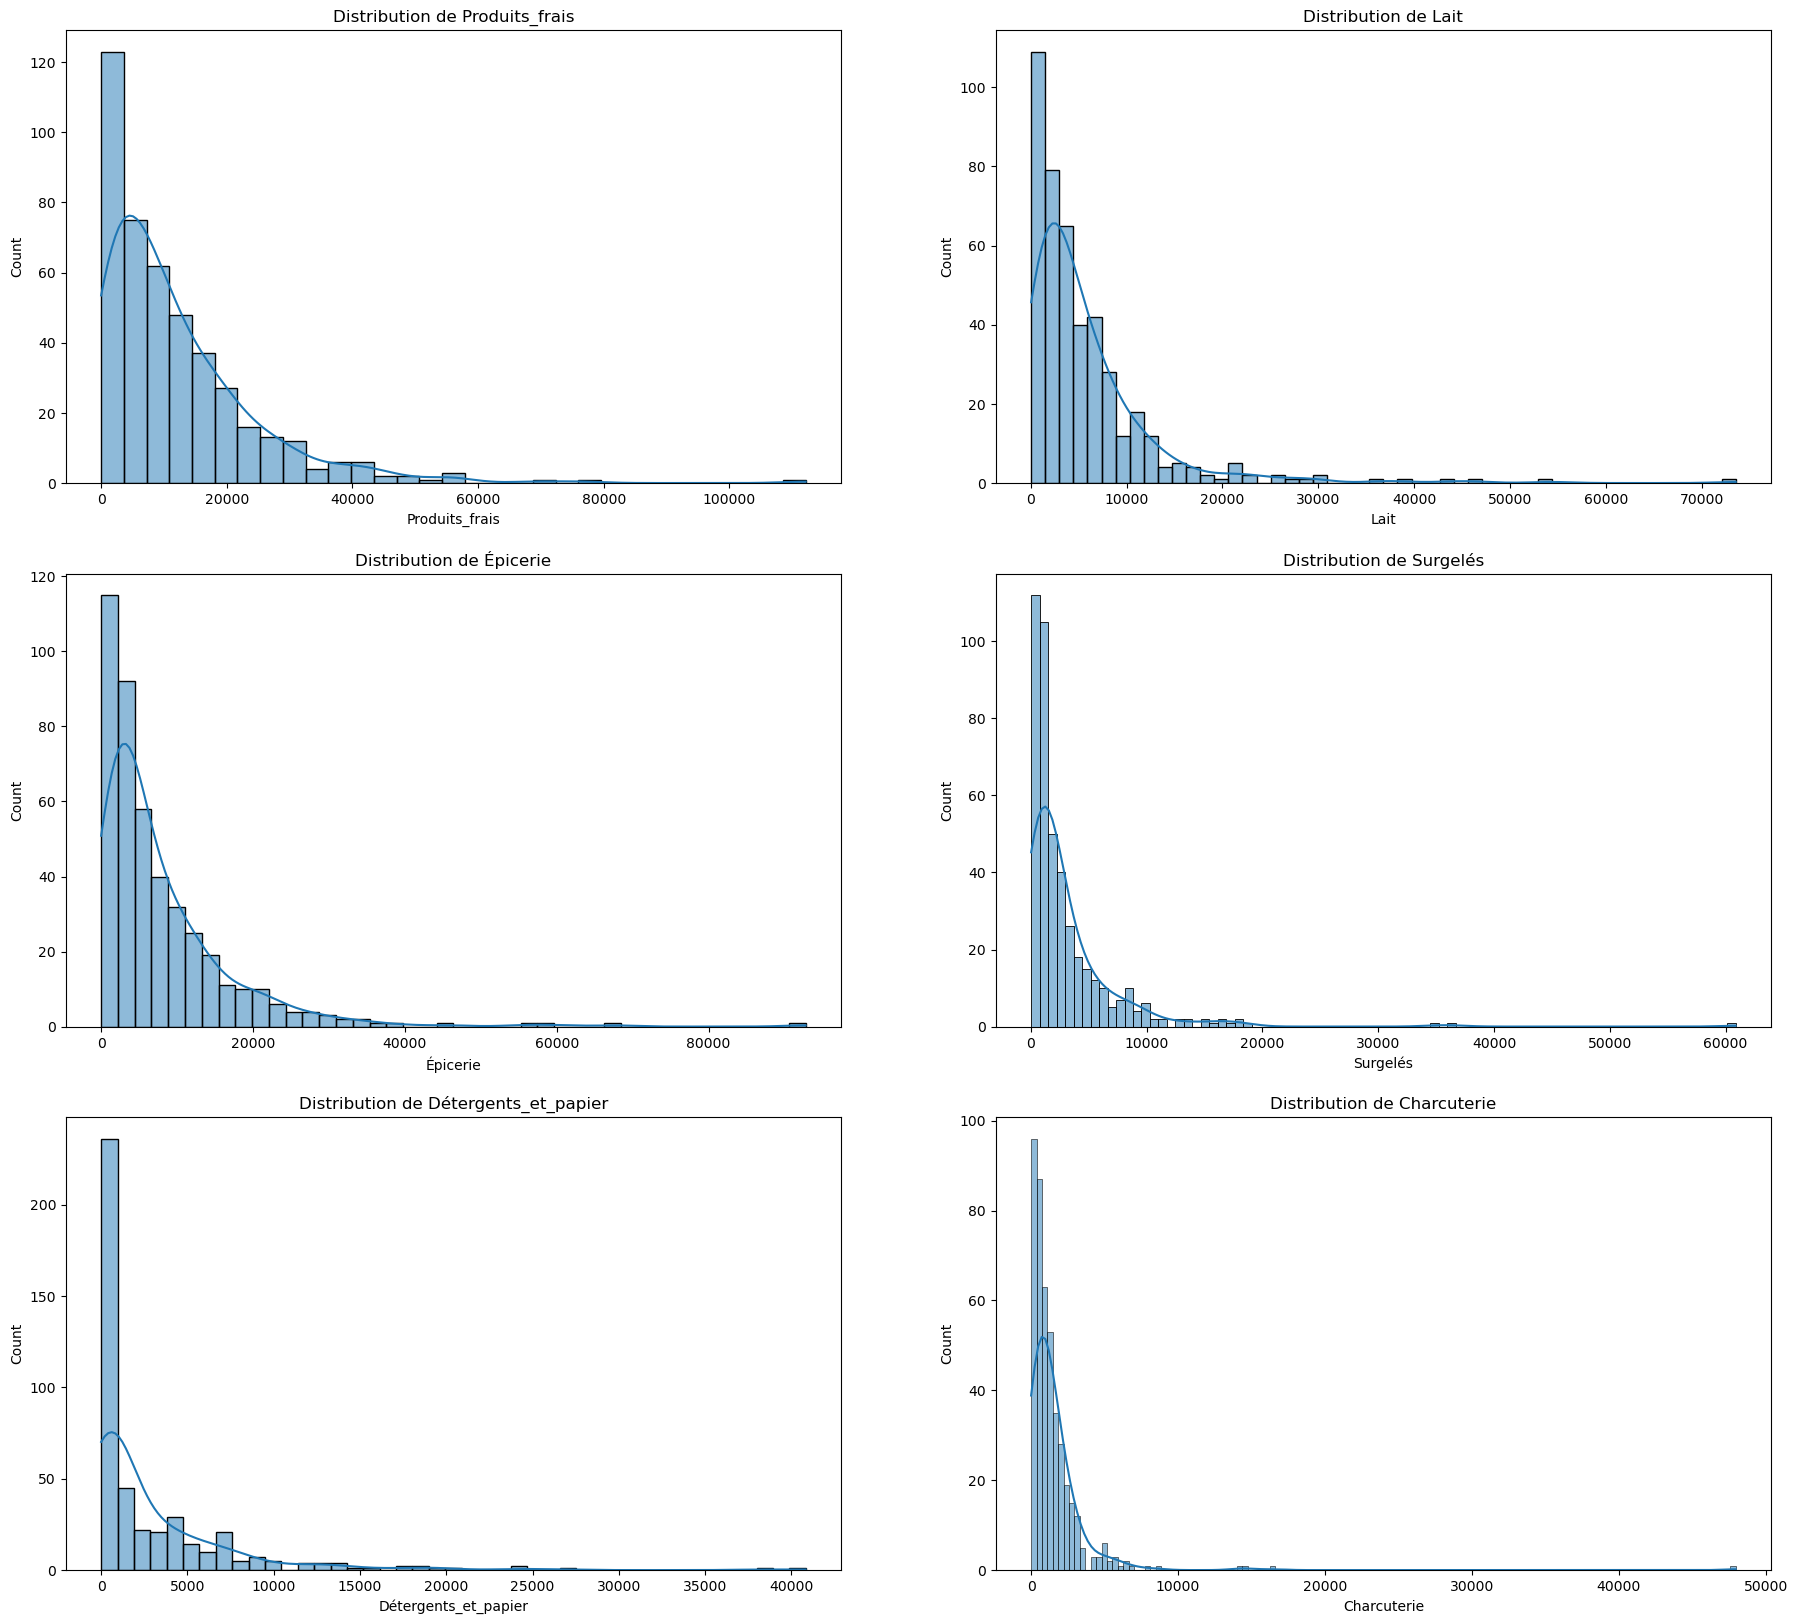

In [16]:
# Distribution des variables numériques
# Pour visualiser la répartition des variables de consommation
plt.figure(figsize=(22, 20))
for index,col in enumerate(num_colomns):
    plt.subplot(3, 2, index+1)
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution de {col}')
plt.show()

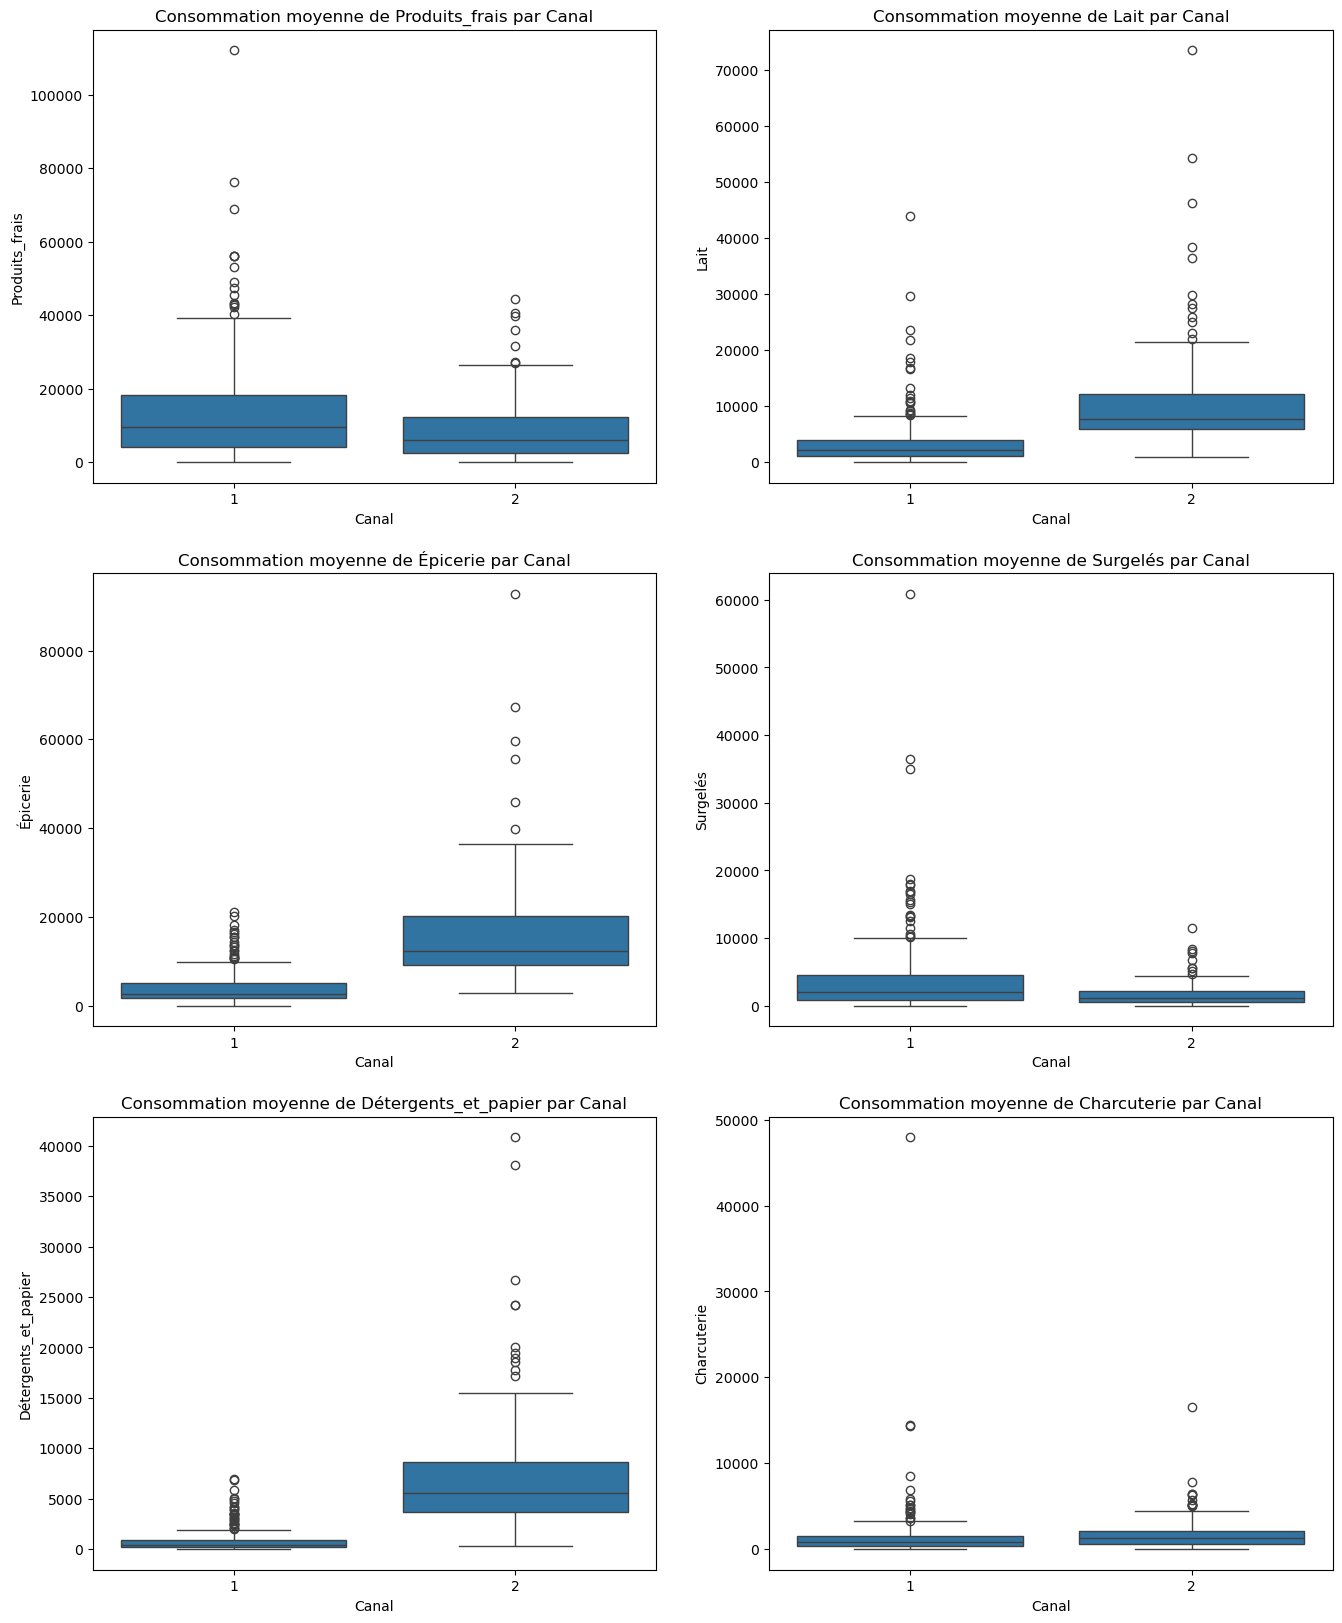

In [17]:
# Boxplots par groupe (Canal)
# Pour comparer la consommation moyenne par groupe (Canal)
plt.figure(figsize=(16, 20))
for index,col in enumerate(num_colomns):
    plt.subplot(3, 2, index+1)
    sns.boxplot(x='Canal', y=col, data=data)
    plt.title(f'Consommation moyenne de {col} par Canal')
plt.show()

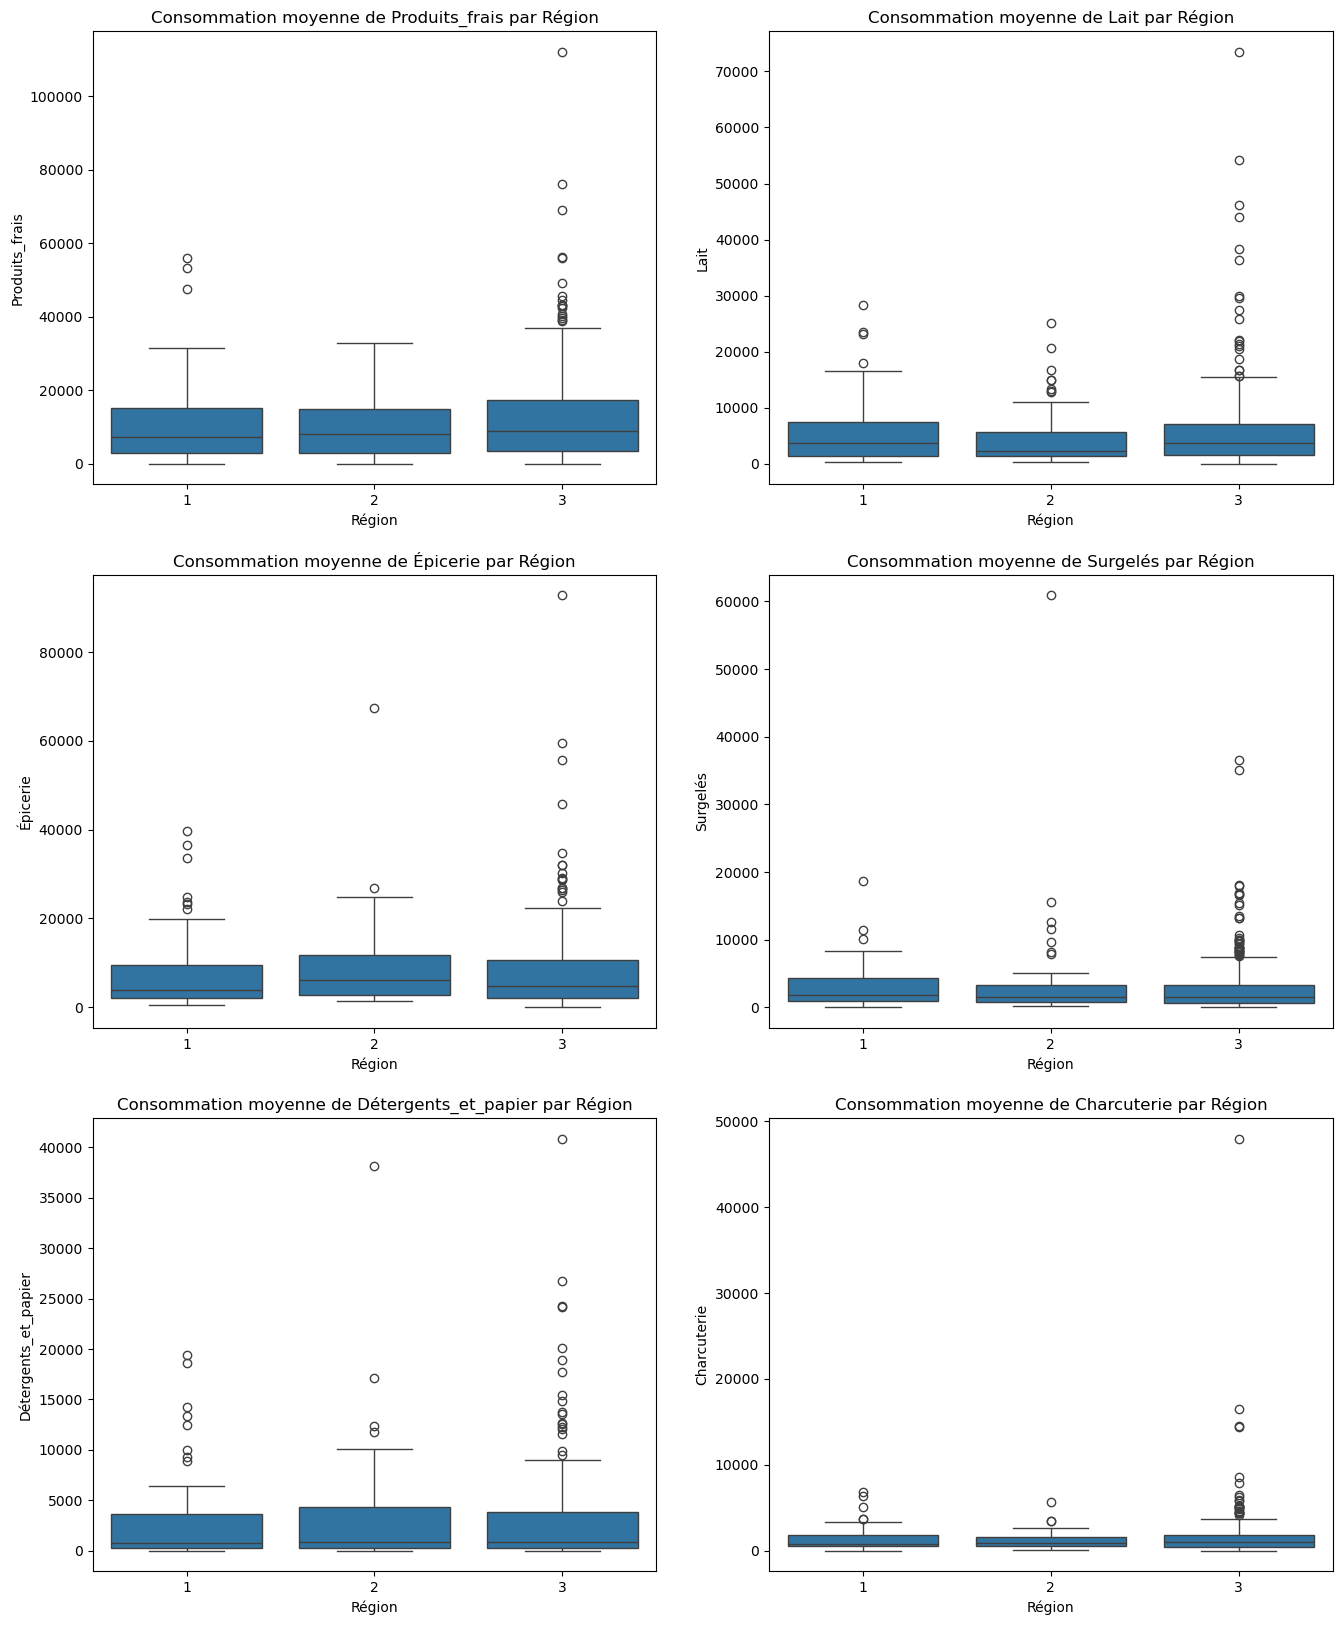

In [18]:
# Boxplots par groupe "Région"
# Pour comparer la consommation moyenne par groupe "Région"
plt.figure(figsize=(16, 20))
for index,col in enumerate(num_colomns):
    plt.subplot(3, 2, index+1)
    sns.boxplot(x='Région', y=col, data=data)
    plt.title(f'Consommation moyenne de {col} par Région')
plt.show()

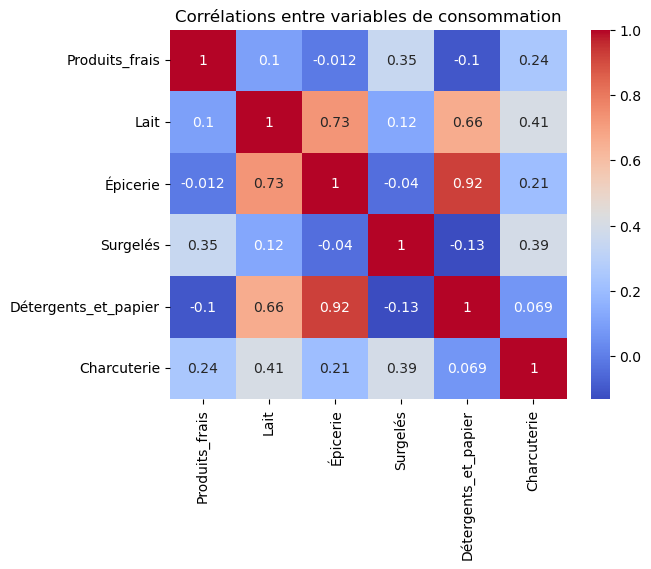

In [19]:
# Corrélations entre variables de consommation
# Utilité : Identifier les variables liées (ex. Lait & Épicerie)
plt.title("Corrélations entre variables de consommation")
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### **Application de K-Means pour segmenter les clients**

**Cas1 : dim=2**

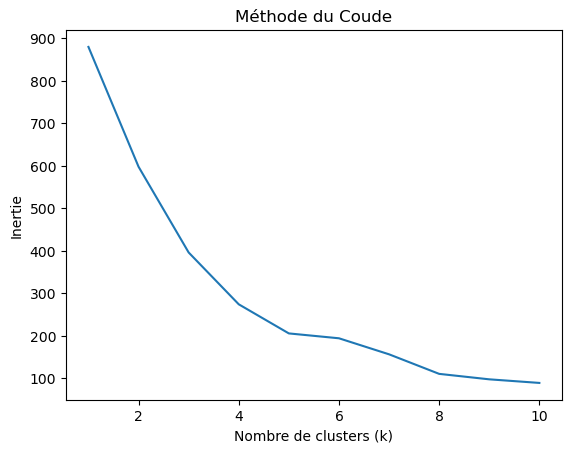

In [22]:
# Calculer l'inertie pour différents k
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled_dim2)
    inertias.append(kmeans.inertia_)

# Afficher la courbe du coude
plt.plot(range(1, 11), inertias)
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.show()

In [23]:
# Appliquer K-means avec k = 4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_scaled_dim2)

# Obtenir les centroïdes et les labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Ajouter les labels des clusters au DataFrame
X_dim2['Cluster'] = labels

X_dim2.head(3)

,Produits_frais,Lait,Cluster
0,12669,9656,3
1,7057,9810,3
2,6353,8808,3


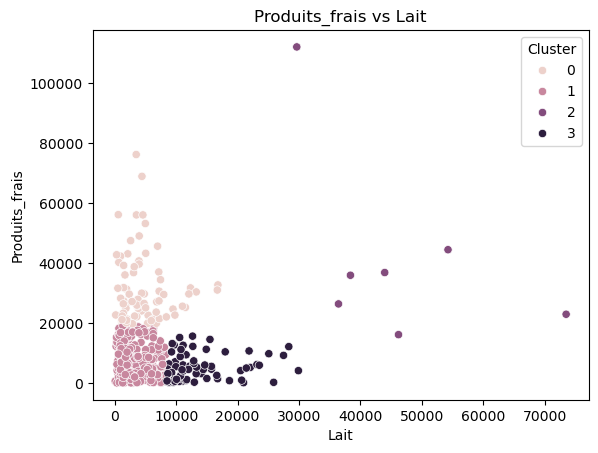

In [24]:
sns.scatterplot(data=X_dim2, x="Lait", y="Produits_frais", hue="Cluster")
plt.title("Produits_frais vs Lait")
plt.show()

**Cas2: dim>2**

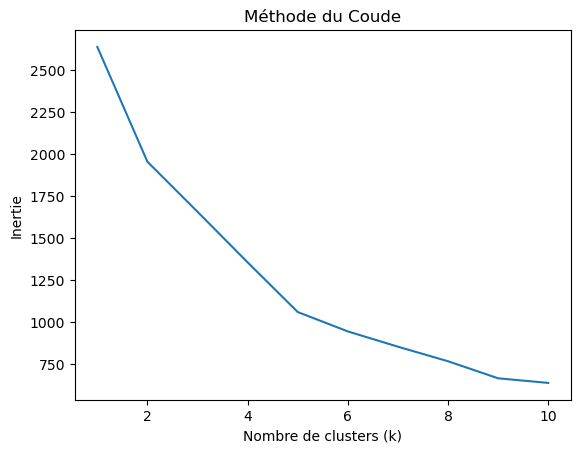

In [26]:
# Calculer l'inertie pour différents k
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Afficher la courbe du coude
plt.plot(range(1, 11), inertias)
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.show()

In [27]:
# Appliquer K-means avec k = 5
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_scaled)

# Obtenir les centroïdes et les labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Ajouter les labels des clusters au DataFrame
data['Cluster'] = labels

data.head(3)

,Canal,Région,Produits_frais,Lait,Épicerie,Surgelés,Détergents_et_papier,Charcuterie,Cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3


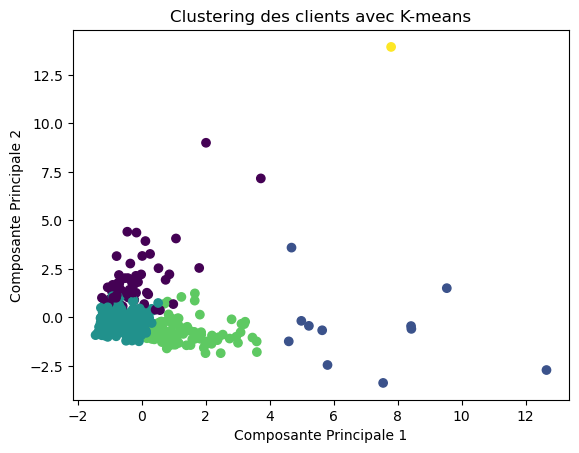

In [28]:
# Réduire la dimensionnalité à 2 dimensions avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualiser les clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clustering des clients avec K-means')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

In [29]:
# Moyenne des variables pour chaque cluster
data.groupby('Cluster').mean()

,Canal,Région,Produits_frais,Lait,Épicerie,Surgelés,Détergents_et_papier,Charcuterie
Cluster,,,,,,,,
0,1.126984,2.682540,32957.984127,4997.349206,5884.761905,8422.841270,954.603175,2462.968254
1,2.000000,2.545455,16911.090909,34864.363636,46126.181818,3245.454545,23008.090909,4177.363636
2,1.133829,2.516729,9115.319703,2954.368030,3785.810409,2276.747212,978.609665,976.349442
3,1.906250,2.520833,5509.250000,10555.635417,16477.927083,1420.125000,7199.406250,1658.791667
4,1.000000,3.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000
